Exploratory Data Analysis


In [4]:
import pandas as pd
import numpy as np
import sklearn 
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

In [ ]:
path = "Customer_Churn_Data_Large.xlsx"
demographics = pd.read_excel(path,sheet_name="Customer_Demographics")
Transactions = pd.read_excel(path,sheet_name="Transaction_History")
service = pd.read_excel(path,sheet_name="Customer_Service")
Activity = pd.read_excel(path,sheet_name="Online_Activity")
Churn = pd.read_excel(path,sheet_name="Churn_Status")



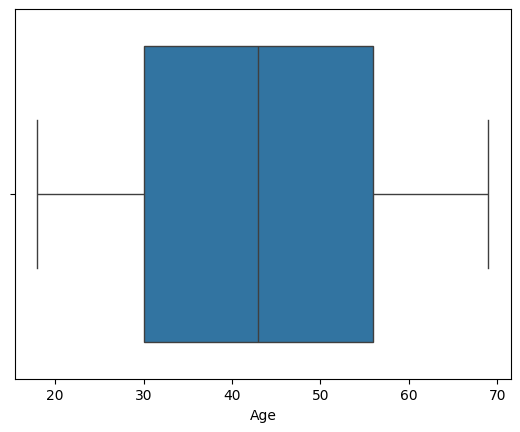

In [ ]:
demographics.head()
demographics['Age'].describe()
sns.boxplot(x=demographics['Age'])
plt.show()

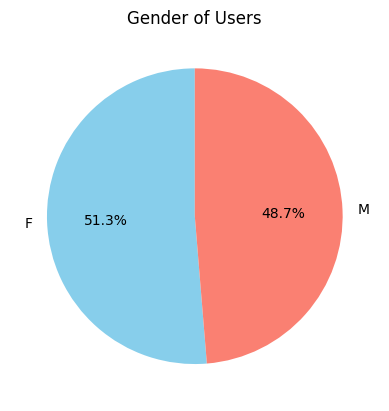

In [ ]:
counts = demographics['Gender'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange']  # optional colors
)

plt.title('Gender of Users')
plt.ylabel("")
plt.show()


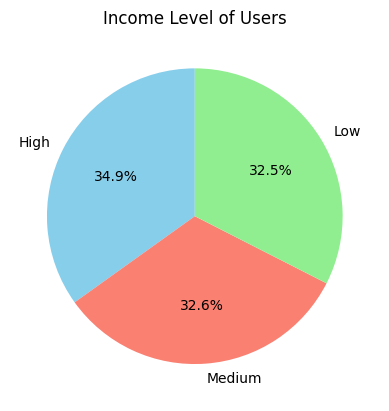

In [ ]:
counts = demographics['IncomeLevel'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange']  # optional colors
)

plt.title('Income Level of Users')
plt.ylabel("")
plt.show()


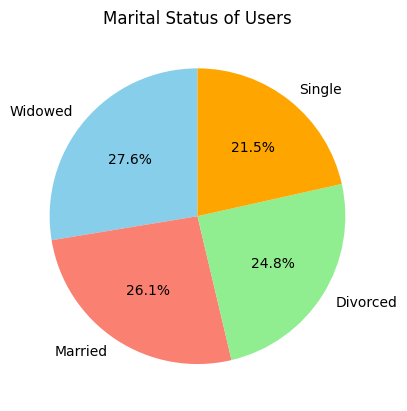

In [ ]:
counts = demographics['MaritalStatus'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange']  # optional colors
)

plt.title('Marital Status of Users')
plt.ylabel("")
plt.show()

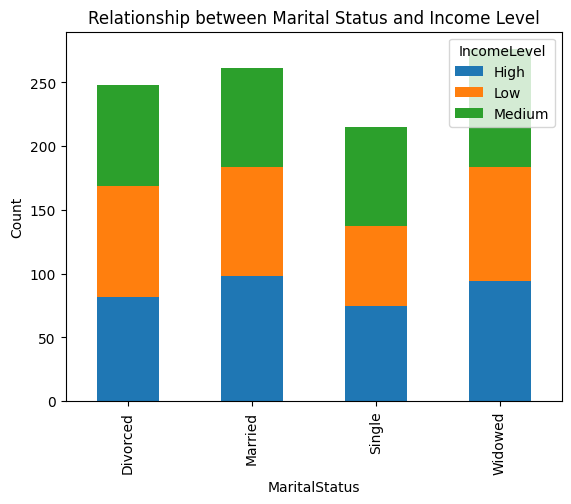

In [ ]:

ct = pd.crosstab(demographics['MaritalStatus'], demographics['IncomeLevel'])

# Stacked bar plot
ct.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.title("Relationship between Marital Status and Income Level")
plt.show()


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


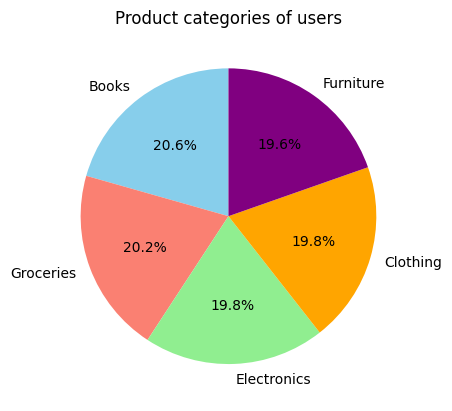

In [ ]:
counts = Transactions['ProductCategory'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange','purple']  # optional colors
)

plt.title('Product categories of users')
plt.ylabel("")
plt.show()

<Axes: title={'center': 'AmountSpent'}, xlabel='ProductCategory'>

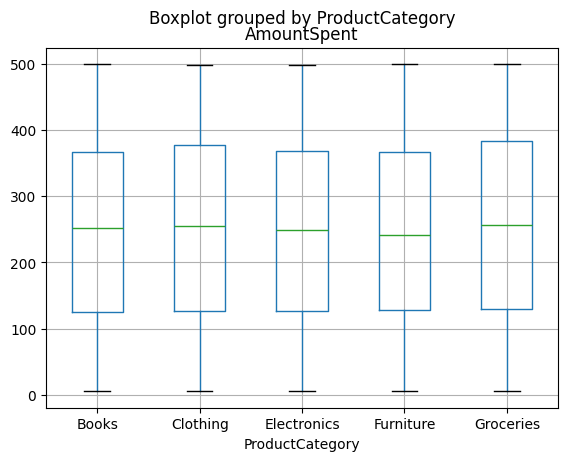

In [ ]:
Transactions.boxplot(column='AmountSpent', by='ProductCategory')

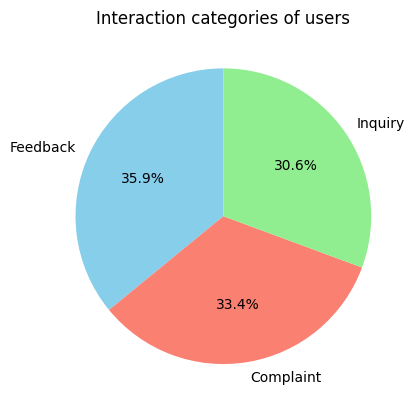

In [ ]:
counts = service['InteractionType'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange','purple']  # optional colors
)

plt.title('Interaction categories of users')
plt.ylabel("")
plt.show()

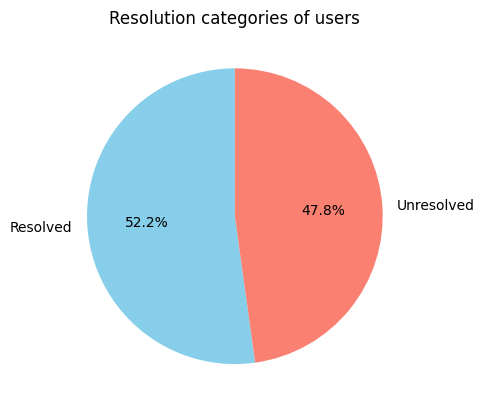

In [ ]:
counts = service['ResolutionStatus'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange','purple']  # optional colors
)

plt.title('Resolution categories of users')
plt.ylabel("")
plt.show()

<Axes: xlabel='InteractionType'>

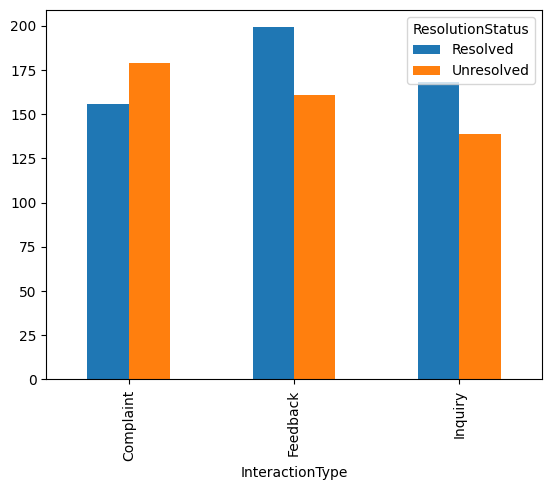

In [ ]:
ct = pd.crosstab(service['InteractionType'],service['ResolutionStatus'])
ct.plot(kind='bar')

In [ ]:
Activity.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


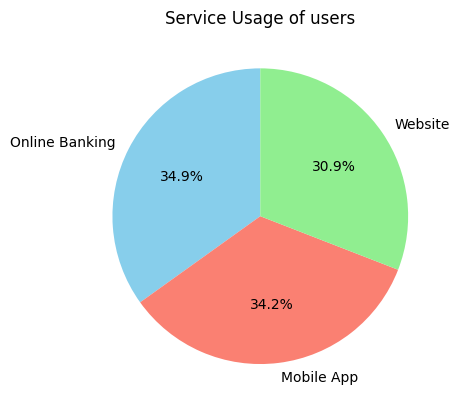

In [ ]:


counts = Activity['ServiceUsage'].value_counts()
counts.plot.pie(
    autopct='%1.1f%%',  # show percentage on each slice
    startangle=90,       # rotate so first slice is at top
    colors=['skyblue', 'salmon', 'lightgreen', 'orange','purple']  # optional colors
)

plt.title('Service Usage of users')
plt.ylabel("")
plt.show()

<Axes: xlabel='ServiceUsage'>

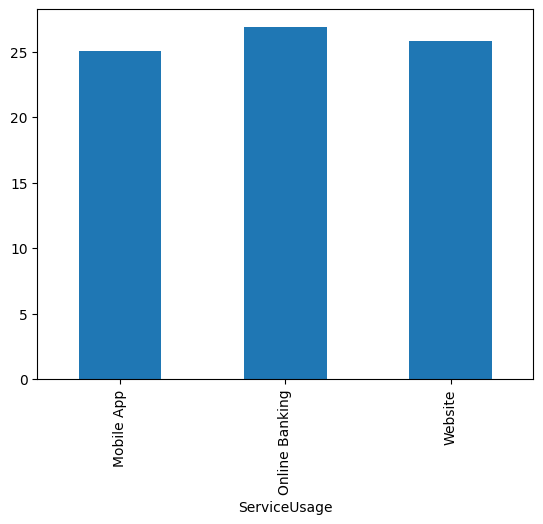

In [ ]:
Activity.groupby('ServiceUsage')['LoginFrequency'].mean().plot(kind='bar')

<Axes: xlabel='ProductCategory'>

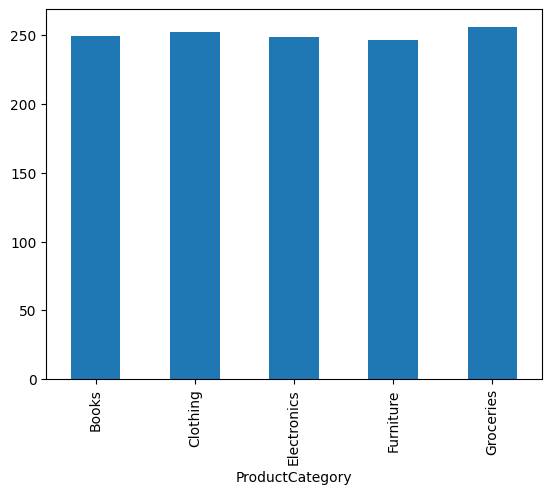

In [ ]:
Transactions.groupby('ProductCategory')['AmountSpent'].mean().plot(kind='bar')

In [ ]:
df = pd.DataFrame()

In [ ]:
TotalSpent = (
    Transactions.groupby('CustomerID')['AmountSpent'].sum().reset_index(name='total_spent')
)
TotalSpent['total_spent'] = (TotalSpent['total_spent']-TotalSpent['total_spent'].mean())/(TotalSpent['total_spent'].max()-TotalSpent['total_spent'].min())
spend = TotalSpent.drop(columns = 'CustomerID')
spend.tail()

df['Total Spend'] = spend
df.head()

,Total Spend
0,-0.251930
1,0.083035
2,0.129110
3,-0.103602
4,0.217525


In [ ]:
ModeCategory = (Transactions.groupby('CustomerID')['ProductCategory'].agg(lambda x:x.mode().iat[0]).reset_index(name='Mode Category'))
#ModeCategory.info()

ModeCategory_encoded = pd.get_dummies(ModeCategory,columns=['Mode Category'],dtype=int)
mc_final = ModeCategory_encoded.drop(columns='CustomerID')
mc_final.head()


,Mode Category_Books,Mode Category_Clothing,Mode Category_Electronics,Mode Category_Furniture,Mode Category_Groceries
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0


In [ ]:
Demo_encoded  = pd.get_dummies(demographics,columns=['Gender','IncomeLevel'],dtype=int)
Demo_encoded.head()
demos = Demo_encoded.drop(columns = ['CustomerID','MaritalStatus'])
demos['Age'] = (demos['Age']-demos['Age'].mean())/(demos['Age'].max()-demos['Age'].min())
demos.head()

,Age,Gender_F,Gender_M,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium
0,0.367314,0,1,0,1,0
1,0.426137,0,1,0,1,0
2,-0.495431,0,1,0,1,0
3,-0.436608,0,1,0,1,0
4,-0.436608,0,1,0,0,1


In [ ]:
Churn_final = Churn['ChurnStatus']
Churn_final.value_counts()



ChurnStatus
0    796
1    204
Name: count, dtype: int64

In [ ]:
usage_types_encoded = pd.get_dummies(Activity,columns=['ServiceUsage'],dtype=int)
#usage_types_encoded.head()
usage_types_encoded['LoginFrequency'] = (usage_types_encoded['LoginFrequency']-usage_types_encoded['LoginFrequency'].mean())/(usage_types_encoded['LoginFrequency'].max()-usage_types_encoded['LoginFrequency'].min())
user_types = usage_types_encoded.drop(columns = ['CustomerID','LastLoginDate'])
user_types.head()

,LoginFrequency,ServiceUsage_Mobile App,ServiceUsage_Online Banking,ServiceUsage_Website
0,0.168500,1,0,0
1,-0.435667,0,0,1
2,-0.477333,0,0,1
3,-0.498167,0,0,1
4,0.314333,0,0,1


In [ ]:
df_final = pd.concat([df,mc_final,demos,user_types],axis=1)
df_final.head()

,Total Spend,Mode Category_Books,Mode Category_Clothing,Mode Category_Electronics,Mode Category_Furniture,Mode Category_Groceries,Age,Gender_F,Gender_M,IncomeLevel_High,IncomeLevel_Low,IncomeLevel_Medium,LoginFrequency,ServiceUsage_Mobile App,ServiceUsage_Online Banking,ServiceUsage_Website
0,-0.251930,0,0,1,0,0,0.367314,0,1,0,1,0,0.168500,1,0,0
1,0.083035,0,0,1,0,0,0.426137,0,1,0,1,0,-0.435667,0,0,1
2,0.129110,0,0,0,1,0,-0.495431,0,1,0,1,0,-0.477333,0,0,1
3,-0.103602,0,0,1,0,0,-0.436608,0,1,0,1,0,-0.498167,0,0,1
4,0.217525,0,0,1,0,0,-0.436608,0,1,0,0,1,0.314333,0,0,1


In [ ]:
X = df_final
y = Churn_final
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16,stratify=y)

In [ ]:
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train,y_train)

In [ ]:
model = LogisticRegression(class_weight='balanced',random_state=42)

In [ ]:
model.fit(X_res,y_res)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'sklearn'